##**Top-k High utility**
High-utility itemset mining focuses on finding patterns (itemsets) that generate a high profit, utility, or impact, which is a step beyond traditional frequent itemset mining that simply counts occurrences. When working with uncertain data, this involves accounting for uncertainty in data, such as probabilistic item occurrences, which complicates the process of mining these patterns.

In [12]:
"""
+------------------+---------------------+
|Transactions      |Items                |
+------------------+---------------------+
|Transaction1      |Milk, Bread          |
|Transaction2      |Milk, Cheese         |
|Transaction3      |Bread, Cheese        |
|Transaction4      |Milk, Bread          |
|Transaction5      |Milk                 |
|Transaction6      |Cheese               |
|Transaction7      |Milk, Bread, Cheese  |
|Transaction8      |Bread                |
+------------------+---------------------+

Milk: $1 profit per unit
Bread: $2 profit per unit
Cheese: $5 profit per unit
"""

'\n+------------------+---------------------+\n|Transactions      |Items                |\n+------------------+---------------------+\n|Transaction1      |Milk, Bread          |\n|Transaction2      |Milk, Cheese         |\n|Transaction3      |Bread, Cheese        |\n|Transaction4      |Milk, Bread          |\n|Transaction5      |Milk                 |\n|Transaction6      |Cheese               |\n|Transaction7      |Milk, Bread, Cheese  |\n|Transaction8      |Bread                |\n+------------------+---------------------+\n\nMilk: $1 profit per unit\nBread: $2 profit per unit\nCheese: $5 profit per unit\n'

#What is High Utility item?
Utility represents the "value" or "importance" of an item or pattern in the dataset. This could be profit, weight, usefulness, or any other metric that quantifies the importance of an itemset.

As for the dataset above, the item with the highest utility is Cheese for generating 5$ profit per unit sold

A high utility itemset is a group of items (like {milk, bread}). A high-utility itemset is a set of items that, when sold together, generates a lot of value (utility). It’s not just about how often the itemset appears (frequency) but also how valuable it is in terms of utility

Bread, Cheese and Milk transaction (transaction 7) returns the highest utility

#TUFP (Top-K Uncertain Frequent Pattern)
A Top-k data mining algorithm that allows us to choose the Top-K Items or Itemsets to be returned from the dataset, where users define k how they see fit

In [13]:
utility = {
  'Milk': 1,
  'Bread': 2,
  'Cheese': 5
}

transactions = [
  ['Milk', 'Bread'],
  ['Milk', 'Cheese'],
  ['Bread', 'Cheese'],
  ['Milk', 'Bread'],
  ['Milk'],
  ['Cheese'],
  ['Milk', 'Bread', 'Cheese'],
  ['Bread']
]

def calculate_utility(itemset):
  total_utility = 0
  for item in itemset:
    total_utility += utility[item]
  return total_utility

def find_top_k_high_utility_itemsets(transactions, K):
  itemset_utilities = {}

  for transaction in transactions:
    itemset = tuple(sorted(transaction))
    if itemset in itemset_utilities:
      itemset_utilities[itemset] += calculate_utility(itemset)
    else:
      itemset_utilities[itemset] = calculate_utility(itemset)

  sorted_itemsets = sorted(itemset_utilities.items(), key=lambda x: x[1], reverse=True)
  return sorted_itemsets[:K]

K = 3

top_k_itemsets = find_top_k_high_utility_itemsets(transactions, K)

for itemset, total_utility in top_k_itemsets:
  print(f"Itemset: {itemset}, Total Utility: ${total_utility}")


Itemset: ('Bread', 'Cheese', 'Milk'), Total Utility: $8
Itemset: ('Bread', 'Cheese'), Total Utility: $7
Itemset: ('Bread', 'Milk'), Total Utility: $6


#Positive and Negative Utility

Positive ultilities represent benefits or profits derived from items in a transaction, when an item contributes positively to an outcome.
Negative ultilities represent costs, losses, or negative impacts associated with items.
An item’s ultility are defined by many factors and contexts. A dataset can come with a pre-defined utility values or not.


#Exploring algorithms for TUFP

##Dataset Preparation

We would also like to try it on a real dataset. Therefore, we chose foodmart from SPMF

In [14]:
import time
import random
from typing import List, Dict, Tuple

benchmark_datasets: Dict[str, List[List[str]]] = {
    "Dataset_1": [
          ['Milk', 'Bread'],
          ['Milk', 'Cheese'],
          ['Bread', 'Cheese'],
          ['Milk', 'Bread'],
          ['Milk'],
          ['Cheese'],
          ['Milk', 'Bread', 'Cheese'],
          ['Bread'],
          ['Milk', 'Bread', 'Butter'],
          ['Bread', 'Cheese', 'Juice'],
          ['Milk', 'Egg'],
          ['Egg', 'Juice'],
          ['Milk', 'Bread', 'Cheese', 'Egg'],
          ['Butter', 'Egg', 'Juice'],
          ['Milk', 'Bread', 'Juice'],
    ],

    "Dataset_2": [
          ['Milk', 'Bread', 'Juice'],
          ['Milk', 'Juice'],
          ['Juice', 'Cheese'],
          ['Milk', 'Bread'],
          ['Bread', 'Egg'],
          ['Juice'],
          ['Egg', 'Butter', 'Cheese'],
          ['Milk', 'Bread', 'Cheese'],
          ['Egg', 'Bread', 'Butter'],
          ['Bread', 'Cheese', 'Juice'],
          ['Milk', 'Egg'],
          ['Cheese', 'Juice'],
          ['Milk', 'Bread', 'Cheese', 'Egg'],
          ['Butter', 'Egg', 'Juice'],
          ['Milk', 'Bread', 'Juice']
    ],

    "Dataset_3": [
        ['Milk', 'Bread', 'Cheese'],
        ['Butter', 'Egg', 'Juice'],
        ['Milk', 'Cheese', 'Egg'],
        ['Milk', 'Bread', 'Butter', 'Egg'],
        ['Juice', 'Bread', 'Egg'],
        ['Milk', 'Juice'],
        ['Butter', 'Bread', 'Cheese'],
        ['Egg', 'Juice'],
        ['Milk', 'Butter', 'Cheese'],
        ['Milk', 'Bread', 'Egg', 'Juice'],
        ['Cheese', 'Juice'],
        ['Bread', 'Egg'],
        ['Milk', 'Bread', 'Juice'],
        ['Milk', 'Egg'],
        ['Milk', 'Butter', 'Juice'],
        ['Milk', 'Bread', 'Butter'],
        ['Cheese'],
        ['Juice', 'Egg'],
        ['Milk', 'Juice', 'Cheese'],
        ['Butter', 'Cheese'],
        ['Milk', 'Bread'],
        ['Bread', 'Butter', 'Egg'],
        ['Bread', 'Cheese', 'Juice'],
        ['Egg', 'Juice', 'Butter'],
        ['Milk', 'Bread', 'Cheese', 'Egg']
    ],

    "Dataset_4":  [],

    "Dataset_5": []
}

# Function to load and format Dataset 5 from the foodmartFIM.txt file
def load_foodmart_dataset(filepath: str) -> List[List[str]]:
    """
    Load a dataset from a file where each line represents a transaction.

    Args:
        filepath (str): Path to the dataset file.

    Returns:
        List[List[str]]: A list of transactions, where each transaction is a list of items.

    Example:
        Input file content:
        Milk,Bread
        Juice,Cheese

        Output:
        [['Milk', 'Bread'], ['Juice', 'Cheese']]
    """
    dataset = []
    with open(filepath, 'r') as f:
        for line in f:
            items = line.strip().split(',')
            dataset.append(items)
    return dataset

def split_items(transaction):
    """
    Split a transaction string into individual items.

    Args:
        transaction (List[str]): A transaction containing a single string of items.

    Returns:
        List[str]: A list of individual items.

    Example:
        Input: ['Milk Bread']
        Output: ['Milk', 'Bread']
    """
    return transaction[0].split()

# Load Dataset 4 into benchmark_datasets
kosarak_data = load_foodmart_dataset('D:/University/Design and analysis of algorithms/Midterm/Inputs/Kosarak.txt')
benchmark_datasets["Dataset_4"] = kosarak_data

benchmark_datasets["Dataset_4"] = [split_items(transaction) for transaction in benchmark_datasets["Dataset_4"]]

# Load Dataset 5 into benchmark_datasets
foodmart_data = load_foodmart_dataset('D:/University/Design and analysis of algorithms/Midterm/Inputs/foodmartFIM.txt')
benchmark_datasets["Dataset_5"] = foodmart_data

benchmark_datasets["Dataset_5"] = [split_items(transaction) for transaction in benchmark_datasets["Dataset_5"]]

import random

def create_utility_dict_for_dataset(dataset):
    """
    Create a utility dictionary for items in a dataset, assigning random utilities.

    Args:
        dataset (List[List[str]]): A dataset represented as a list of transactions.

    Returns:
        Dict[str, float]: A dictionary mapping each item to a random utility value.

    Example:
        Input: [['Milk', 'Bread'], ['Juice']]
        Output: {'Milk': 4.5, 'Bread': -2.1, 'Juice': 7.8} (random values)
    """
    # Set the random seed for reproducibility
    random.seed(42)

    utility_dict = {}
    for transaction in dataset:
        for item in transaction:
            if item not in utility_dict:
                # Generate random utility between -10 and 10 (positive and negative range)
                utility_dict[item] = random.uniform(-15, 15)
    return utility_dict

utility_dict_4_extended = create_utility_dict_for_dataset(benchmark_datasets["Dataset_4"])
utility_dict_5_extended = create_utility_dict_for_dataset(benchmark_datasets["Dataset_5"])

utility_dict_4 = create_utility_dict_for_dataset(benchmark_datasets["Dataset_4"])
utility_dict_5 = create_utility_dict_for_dataset(benchmark_datasets["Dataset_5"])

def calculate_item_probabilities(transactions: List[List[str]]) -> Dict[str, float]:
    """
    Calculate the probability of each item appearing in the transactions.

    Args:
        transactions (List[List[str]]): A list of transactions, each containing a list of items.

    Returns:
        Dict[str, float]: A dictionary mapping each item to its probability of occurrence.

    Example:
        Input: [['Milk', 'Bread'], ['Bread', 'Cheese']]
        Output: {'Milk': 0.5, 'Bread': 1.0, 'Cheese': 0.5}
    """
    item_counts = {}
    total_transactions = len(transactions)

    # Count the number of transactions each item appears in
    for transaction in transactions:
        unique_items = set(transaction)  # Consider unique items per transaction
        for item in unique_items:
            item_counts[item] = item_counts.get(item, 0) + 1

    # Calculate probability for each item
    item_probabilities = {item: count / total_transactions for item, count in item_counts.items()}
    return item_probabilities

# Calculate probabilities for each dataset
item_probabilities_dataset_1 = calculate_item_probabilities(benchmark_datasets["Dataset_1"])
item_probabilities_dataset_2 = calculate_item_probabilities(benchmark_datasets["Dataset_2"])
item_probabilities_dataset_3 = calculate_item_probabilities(benchmark_datasets["Dataset_3"])
item_probabilities_dataset_4 = calculate_item_probabilities(benchmark_datasets["Dataset_4"])
item_probabilities_dataset_5 = calculate_item_probabilities(benchmark_datasets["Dataset_5"])

print("Item Probabilities for Dataset 1:")
print(item_probabilities_dataset_1)
print("Item Probabilities for Dataset 2:")
print(item_probabilities_dataset_2)
print("Item Probabilities for Dataset 3:")
print(item_probabilities_dataset_3)
print("Item Probabilities for Dataset 4:")
print(item_probabilities_dataset_4)
print("Item Probabilities for Dataset 5:")
print(item_probabilities_dataset_5)

# item utilities to avoid very low or negative utilities
item_utilities_new: Dict[str, int] = {
    'Milk': 10, 'Bread': 12, 'Cheese': 5, 'Butter': 8, 'Egg': 6, 'Juice': 4
}
#item_utilities_new.update(utility_dict_4)
#item_utilities_new.update(utility_dict_5)

# Function to introduce negative utilities to a percentage of items
def apply_negative_utilities(item_utilities: Dict[str, int], negative_percentage: float = 0.2) -> Dict[str, int]:
    """
    Convert a percentage of item utilities to negative values.

    Args:
        item_utilities (Dict[str, int]): A dictionary of item utilities.
        negative_percentage (float): The percentage of items to assign negative utilities.

    Returns:
        Dict[str, int]: The modified dictionary with some negative utilities.

    Example:
        Input: {'Milk': 10, 'Bread': 12, 'Cheese': 5}, negative_percentage=0.5
        Output: {'Milk': -10, 'Bread': -12, 'Cheese': 5}
    """
    items = list(item_utilities.keys())
    num_negative_items = int(len(items) * negative_percentage)
    negative_items = random.sample(items, num_negative_items)

    for item in negative_items:
        item_utilities[item] = -abs(item_utilities[item])  # Make the utility negative

    return item_utilities

# Apply negative utilities to 20% of items
item_utilities_new = apply_negative_utilities(item_utilities_new, negative_percentage=0.2)
print("Item Utilities with Negative Values:")
print(item_utilities_new)
print("Item Utilities for the forth dataset:")
print(utility_dict_4)
print("Item Utilities for the fifth dataset:")
print(utility_dict_5)

# Modify transaction modifiers to include negative values
transaction_modifiers: List[float] = [
    2.2, -0.8, 1.5, -1.0, 0.9, 1.3, -1.1, 0.7, -1.4, 1.6, 0.5, -0.8, 1.3, -0.6, 1.2
]

Item Probabilities for Dataset 1:
{'Milk': 0.6, 'Bread': 0.6, 'Cheese': 0.4, 'Butter': 0.13333333333333333, 'Juice': 0.26666666666666666, 'Egg': 0.26666666666666666}
Item Probabilities for Dataset 2:
{'Juice': 0.5333333333333333, 'Milk': 0.4666666666666667, 'Bread': 0.5333333333333333, 'Cheese': 0.4, 'Egg': 0.4, 'Butter': 0.2}
Item Probabilities for Dataset 3:
{'Milk': 0.52, 'Cheese': 0.4, 'Bread': 0.48, 'Juice': 0.48, 'Egg': 0.48, 'Butter': 0.36}
Item Probabilities for Dataset 4:
{'2': 0.043375386278569315, '-2': 0.9999966004086309, '1': 0.19897468324307419, '3': 0.45560983569774915, '-1': 1.0, '6': 0.6069120491716896, '5': 0.006068270593874616, '7': 0.08716892229554007, '4': 0.07852716103524357, '8': 3.0596322322056886e-05, '9': 0.0015468140729484317, '10': 0.00034335872828086063, '16': 0.00029916404048233405, '14': 0.011745588180300727, '15': 6.459223601323121e-05, '11': 0.3667343185349121, '12': 0.0059662828528010935, '13': 0.0007445105098367176, '17': 0.00250209924767043, '18': 0.

##Uncertain Apriori-Based Algorithm
The U-Apriori algorithm is one of the foundational methods for mining frequent patterns in uncertain data. This algorithm extends the classic Apriori algorithm by calculating the expected support of each itemset based on item probabilities.

Key Concepts:
+ Expected Support: Each itemset’s support is weighted by the probability of its items appearing in the transaction.
+ Threshold Raising: As the algorithm progresses, the minimum expected support threshold is dynamically adjusted.
+ Interactive Mining: By storing intermediate results, the algorithm allows adjustments to parameters like K (Top-K itemsets) without starting from scratch.

In [15]:
import heapq
import time
from typing import List, Dict, Tuple
from itertools import combinations

# Helper function to calculate expected utility
def calculate_expected_utility(
    itemset: List[str],
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> float:
    """
    Calculate the expected utility of an itemset within a set of transactions.

    Args:
        itemset (List[str]): The itemset whose utility needs to be calculated.
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Returns:
        float: The expected utility of the itemset.

    Example:
        Input:
            itemset = ['Milk', 'Bread']
            transactions = [['Milk', 'Bread'], ['Milk', 'Cheese']]
            item_utilities = {'Milk': 10, 'Bread': 12}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8}

        Output:
            16.2
    """

    expected_utility = 0.0
    for transaction in transactions:
        probability = 1.0
        utility = 0
        for item in itemset:
            if item in transaction:
                probability *= item_probabilities.get(item, 0.5)
                utility += item_utilities.get(item, 0)
            else:
                probability = 0
                break
        expected_utility += probability * utility
    return expected_utility

# Generate candidate itemsets from previous itemsets
def generate_candidates(prev_itemsets: List[List[str]]) -> List[List[str]]:
    """
    Generate candidate itemsets by combining previous itemsets.

    Args:
        prev_itemsets (List[List[str]]): A list of itemsets from the previous iteration.

    Returns:
        List[List[str]]: A list of new candidate itemsets formed by combining previous itemsets.

    Example:
        Input:
            prev_itemsets = [['Milk'], ['Bread'], ['Cheese']]

        Output:
            [['Milk', 'Bread'], ['Milk', 'Cheese'], ['Bread', 'Cheese']]
    """

    candidates = []
    length = len(prev_itemsets)
    for i in range(length):
        for j in range(i + 1, length):
            candidate = sorted(set(prev_itemsets[i]) | set(prev_itemsets[j]))
            if len(candidate) == len(prev_itemsets[i]) + 1 and candidate not in candidates:
                candidates.append(candidate)
    return candidates

# Enhanced Uncertain Apriori with Top-K support
def uncertain_apriori(
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float],
    min_expected_utility: float,
    negative_threshold: float,
    k: int
) -> List[Tuple[List[str], float]]:
    """
    Enhanced Uncertain Apriori algorithm for mining Top-K high-utility itemsets from uncertain data.

    Args:
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.
        min_expected_utility (float): The minimum expected utility threshold for itemsets to be considered.
        negative_threshold (float): The threshold to filter out itemsets with high negative utilities.
        k (int): The number of top high-utility itemsets to return.

    Returns:
        List[Tuple[List[str], float]]: A list of Top-K high-utility itemsets along with their expected utilities.

    Example:
        Input:
            transactions = [['Milk', 'Bread'], ['Milk', 'Cheese']]
            item_utilities = {'Milk': 10, 'Bread': 12, 'Cheese': 5}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8, 'Cheese': 0.7}
            min_expected_utility = 5
            negative_threshold = -10
            k = 2

        Output:
            [(['Milk'], 9.0), (['Bread'], 9.6)]
    """

    # Min-heap to maintain the Top-K high-utility itemsets
    high_utility_itemsets = []

    def add_to_top_k(itemset: List[str], utility: float):
        """
        Add an itemset to the Top-K high-utility itemsets using a min-heap.

        Args:
            itemset (List[str]): The itemset to be added.
            utility (float): The calculated utility of the itemset.

        Behavior:
          - If the number of itemsets in the heap is less than K, the itemset is added.
          - If the heap is full and the new itemset has a higher utility than the smallest itemset in the heap, it replaces the smallest one.

        Example:
          Input:
            itemset = ['Milk', 'Bread']
            utility = 16.2
            high_utility_itemsets = [(12.0, ['Bread'])]  # Existing heap

        Behavior:
            The itemset ['Milk', 'Bread'] is added to the heap if its utility is higher.
        """
        if len(high_utility_itemsets) < k:
            heapq.heappush(high_utility_itemsets, (utility, itemset))
        elif utility > high_utility_itemsets[0][0]:
            heapq.heapreplace(high_utility_itemsets, (utility, itemset))

    # Generate initial 1-itemsets
    itemsets = [[item] for item in item_utilities.keys()]

    while itemsets:
        next_itemsets = []

        for itemset in itemsets:
            expected_utility = calculate_expected_utility(itemset, transactions, item_utilities, item_probabilities)

            # Skip itemsets with utility below the negative threshold
            if expected_utility < negative_threshold:
                continue

            # Add itemsets with sufficient utility to the Top-K list
            if expected_utility >= min_expected_utility:
                add_to_top_k(itemset, expected_utility)

            # Generate candidates for the next level
            next_itemsets.extend(generate_candidates([itemset]))

        itemsets = next_itemsets

    # If fewer than k itemsets are found, generate larger combinations
    while len(high_utility_itemsets) < k:
        new_combinations = []
        itemsets = [itemset for _, itemset in high_utility_itemsets]
        for itemset1, itemset2 in combinations(itemsets, 2):
            combined_set = sorted(set(itemset1) | set(itemset2))
            if combined_set not in itemsets and combined_set not in new_combinations:
                combined_utility = calculate_expected_utility(combined_set, transactions, item_utilities, item_probabilities)
                if combined_utility >= min_expected_utility:
                    new_combinations.append((combined_utility, combined_set))

        if not new_combinations:
            break  # Prevent infinite loop if no new combinations are found
        high_utility_itemsets.extend(new_combinations)
        high_utility_itemsets = sorted(high_utility_itemsets, key=lambda x: -x[0])[:k]

    return sorted(high_utility_itemsets, key=lambda x: -x[0])


k = 10
min_expected_utility = 0
negative_threshold = -9

"""
Runs the Uncertain Apriori algorithm on multiple datasets and prints the Top-K high-utility itemsets and their execution times.

Behavior:
    - For each dataset, it runs the algorithm with specified thresholds and prints the results.
    - Execution times for each dataset are also displayed to measure performance.

Example Output:
    Top-K High-Utility Itemsets for Dataset_1: [(['Milk'], 9.0), (['Bread'], 9.6), (['Cheese'], 3.5)]
    Time taken for Dataset_1: 0.0021 seconds
"""


# Run Uncertain Apriori on Dataset_1
start_time = time.time()
high_utility_itemsets_dataset_1 = uncertain_apriori(
    benchmark_datasets["Dataset_1"], item_utilities_new, item_probabilities_dataset_1, min_expected_utility, negative_threshold, k
)
end_time = time.time()
runtime_1_UApriori = end_time - start_time
print("Top-k High-Utility Itemsets for Dataset_1:", high_utility_itemsets_dataset_1)
print(f"Time taken for Dataset_1: {runtime_1_UApriori:.4f} seconds")

# Run Uncertain Apriori on Dataset_2
start_time = time.time()
high_utility_itemsets_dataset_2 = uncertain_apriori(
    benchmark_datasets["Dataset_2"], item_utilities_new, item_probabilities_dataset_2, min_expected_utility, negative_threshold, k
)
end_time = time.time()
runtime_2_UApriori = end_time - start_time
print("Top-k High-Utility Itemsets for Dataset_2:", high_utility_itemsets_dataset_2)
print(f"Time taken for Dataset_2: {runtime_2_UApriori:.4f} seconds")

# Run Uncertain Apriori on Dataset_3
start_time = time.time()
high_utility_itemsets_dataset_3 = uncertain_apriori(
    benchmark_datasets["Dataset_3"], item_utilities_new, item_probabilities_dataset_3, min_expected_utility, negative_threshold, k
)
end_time = time.time()
runtime_3_UApriori = end_time - start_time
print("Top-k High-Utility Itemsets for Dataset_3:", high_utility_itemsets_dataset_3)
print(f"Time taken for Dataset_3: {runtime_3_UApriori:.4f} seconds")

# Run Uncertain Apriori on Dataset_4
start_time = time.time()
high_utility_itemsets_dataset_4 = uncertain_apriori(
    benchmark_datasets["Dataset_4"], utility_dict_4, item_probabilities_dataset_4, min_expected_utility, negative_threshold, k
)
end_time = time.time()
runtime_4_UApriori = end_time - start_time
print("Top-k High-Utility Itemsets for Dataset_4:", high_utility_itemsets_dataset_4)
print(f"Time taken for Dataset_4: {runtime_4_UApriori:.4f} seconds")

# Run Uncertain Apriori on Dataset_5
start_time = time.time()
high_utility_itemsets_dataset_5 = uncertain_apriori(
    benchmark_datasets["Dataset_5"], utility_dict_5, item_probabilities_dataset_5, min_expected_utility, negative_threshold, k
)
end_time = time.time()
runtime_5_UApriori = end_time - start_time
print("Top-k High-Utility Itemsets for Dataset_5:", high_utility_itemsets_dataset_5)
print(f"Time taken for Dataset_5: {runtime_5_UApriori:.4f} seconds")

Top-k High-Utility Itemsets for Dataset_1: [(64.80000000000001, ['Bread']), (54.0, ['Milk']), (47.52, ['Bread', 'Milk']), (16.32, ['Bread', 'Cheese']), (12.0, ['Cheese']), (10.799999999999999, ['Cheese', 'Milk']), (5.12, ['Bread', 'Juice']), (4.266666666666667, ['Juice']), (2.24, ['Juice', 'Milk']), (2.1333333333333333, ['Butter'])]
Time taken for Dataset_1: 0.0000 seconds
Top-k High-Utility Itemsets for Dataset_2: [(51.199999999999996, ['Bread']), (32.66666666666667, ['Milk']), (27.377777777777776, ['Bread', 'Milk']), (17.066666666666666, ['Juice']), (13.653333333333332, ['Bread', 'Juice']), (12.0, ['Cheese']), (10.88, ['Bread', 'Cheese']), (10.453333333333333, ['Juice', 'Milk']), (5.760000000000001, ['Cheese', 'Juice']), (5.6000000000000005, ['Cheese', 'Milk'])]
Time taken for Dataset_2: 0.0000 seconds
Top-k High-Utility Itemsets for Dataset_3: [(69.11999999999999, ['Bread']), (67.60000000000001, ['Milk']), (38.4384, ['Bread', 'Milk']), (25.919999999999995, ['Butter']), (23.040000000

##Up-Growth+ Algorithm
The UP-Growth+ (Utility Pattern Growth Plus) algorithm is an extension of the original UP-Growth method, designed for mining high-utility itemsets efficiently. It focuses on reducing the search space and pruning unpromising paths to improve performance.

Key Concepts:

*   Utility Upper-Bound Pruning: Uses tighter upper bounds to prune branches early if they cannot produce high-utility itemsets, reducing computational overhead.
*   Utility List Structure: Maintains utility lists to track both local and global utilities, streamlining the utility calculation process.
*   Efficient Tree Traversal: Constructs a utility pattern tree to compress transactions and support recursive mining without generating many candidates explicitly.

In [16]:
import time
from collections import defaultdict
from itertools import combinations
from typing import List, Dict, Tuple, Set

# Preprocess the dataset to split multi-item strings into individual items
def preprocess_transactions(transactions: List[List[str]]) -> List[List[str]]:
    """
    Preprocesses the dataset by splitting multi-item transaction strings into individual items.

    Args:
        transactions (List[List[str]]): A list of transactions, where each transaction may contain a single string of concatenated items.

    Returns:
        List[List[str]]: A list of transactions, each containing a list of individual items.

    Example:
        Input:
            transactions = [['Milk Bread'], ['Juice Cheese']]
        Output:
            [['Milk', 'Bread'], ['Juice', 'Cheese']]
    """
    return [transaction[0].split() for transaction in transactions]

# Optimized function to calculate expected utility and prune transactions
def calculate_expected_utility(
    itemset: List[str],
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> Tuple[float, List[List[str]]]:
    """
    Calculates the expected utility of an itemset within a set of transactions, considering item probabilities.

    Args:
        itemset (List[str]): The itemset whose utility needs to be calculated.
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Returns:
        Tuple[float, List[List[str]]]:
            - The expected utility of the itemset.
            - A list of valid transactions containing the itemset.

    Example:
        Input:
            itemset = ['Milk', 'Bread']
            transactions = [['Milk', 'Bread'], ['Milk', 'Cheese']]
            item_utilities = {'Milk': 10, 'Bread': 12}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8}
        Output:
            (16.2, [['Milk', 'Bread'], ['Milk', 'Cheese']])
    """
    expected_utility = 0.0
    valid_transactions = []

    for transaction in transactions:
        probability = 1.0
        utility = 0

        for item in itemset:
            if item in transaction:
                probability *= item_probabilities.get(item, 1.0)
                utility += item_utilities.get(item, 0)

        if probability > 0:
            valid_transactions.append(transaction)
            expected_utility += probability * utility

    return expected_utility, valid_transactions

# Utility Tree Node definition
class UtilityTreeNode:
    """
    Represents a node in the UP-Growth+ utility tree.

    Attributes:
        item (str): The item represented by this node.
        children (Dict[str, 'UtilityTreeNode']): A dictionary of child nodes.
        utility (float): The utility value associated with this node.
        transactions (List[List[str]]): The list of transactions containing the itemset represented by this node.
        upper_bound (float): The upper bound of the utility for pruning purposes.
    """

    def __init__(self, item: str):
        self.item = item
        self.children: Dict[str, 'UtilityTreeNode'] = {}
        self.utility = 0
        self.transactions = []
        self.upper_bound = 0

# Dynamic Gain Utility Pruning
def dynamic_gain_utility(
    node: UtilityTreeNode,
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> bool:
    """
    Applies Dynamic Gain Utility (DGU) pruning by calculating the expected gain of a node.

    Args:
        node (UtilityTreeNode): The current node in the utility tree.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Returns:
        bool: True if the expected gain is positive; False otherwise.

    Example:
        Input:
            node.children = {'Milk': UtilityTreeNode('Milk'), 'Bread': UtilityTreeNode('Bread')}
            item_utilities = {'Milk': 10, 'Bread': 12}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8}
        Output:
            True
    """

    expected_gain = sum(
        item_utilities[child_item] * item_probabilities.get(child_item, 1.0)
        for child_item in node.children
    )
    return expected_gain > 0

# Dynamic Gain Negative Utility Pruning
def dynamic_gain_negative_utility(
    node: UtilityTreeNode,
    item_utilities: Dict[str, int]
) -> bool:
    """
    Applies Dynamic Gain Negative Utility (DGN) pruning by evaluating the sum of negative utilities.

    Args:
        node (UtilityTreeNode): The current node in the utility tree.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.

    Returns:
        bool: True if the sum of negative utilities is above a threshold; False otherwise.

    Example:
        Input:
            node.children = {'Cheese': UtilityTreeNode('Cheese')}
            item_utilities = {'Cheese': -3}
        Output:
            True
    """

    negative_utility_sum = sum(
        item_utilities[child_item]
        for child_item in node.children
        if item_utilities[child_item] < 0
    )
    return negative_utility_sum >= 0

# Update the upper bound of utility for pruning
def update_upper_bound(
    node: UtilityTreeNode,
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> None:
    """
    Updates the upper bound utility of a node for pruning purposes.

    Args:
        node (UtilityTreeNode): The current node in the utility tree.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Behavior:
        - Sets the upper bound to negative infinity if DGU or DGN conditions are not met.
    """

    if not dynamic_gain_utility(node, item_utilities, item_probabilities):
        node.upper_bound = -float('inf')
    elif not dynamic_gain_negative_utility(node, item_utilities):
        node.upper_bound = -float('inf')
    else:
        node.upper_bound = sum(
            item_utilities[child_item] * item_probabilities.get(child_item, 1.0)
            for child_item in node.children
        )

# Helper function to sort and get the top k itemsets
def get_top_k_itemsets(itemsets: List[Tuple[List[str], float]], k: int) -> List[Tuple[List[str], float]]:
    """
    Sorts and retrieves the Top-K high-utility itemsets.

    Args:
        itemsets (List[Tuple[List[str], float]]): A list of itemsets with their corresponding utility values.
        k (int): The number of top itemsets to retrieve.

    Returns:
        List[Tuple[List[str], float]]: The Top-K high-utility itemsets sorted by utility in descending order.

    Example:
        Input:
            itemsets = [(['Milk'], 9.0), (['Bread'], 12.0), (['Cheese'], 5.0)]
            k = 2
        Output:
            [(['Bread'], 12.0), (['Milk'], 9.0)]
    """

    itemsets.sort(key=lambda x: x[1], reverse=True)
    return itemsets[:k]

# Main UP-Growth+ function
def up_growth_plus(
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float],
    min_expected_utility: float,
    k: int
) -> List[Tuple[List[str], float]]:
    """
    Implements the UP-Growth+ algorithm for mining Top-K high-utility itemsets from uncertain data.

    Args:
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.
        min_expected_utility (float): The minimum expected utility threshold for itemsets to be considered.
        k (int): The number of top high-utility itemsets to return.

    Returns:
        List[Tuple[List[str], float]]: The Top-K high-utility itemsets with their expected utilities.

    Example:
        Input:
            transactions = [['Milk', 'Bread'], ['Bread', 'Butter']]
            item_utilities = {'Milk': 10, 'Bread': 12, 'Butter': 8}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8, 'Butter': 0.7}
            min_expected_utility = 10
            k = 2
        Output:
            [(['Bread'], 9.6), (['Milk'], 9.0)]
    """

    root = UtilityTreeNode("root")

    # Build initial tree structure
    for transaction in transactions:
        for item in transaction:
            if item not in root.children:
                root.children[item] = UtilityTreeNode(item)
            root.children[item].transactions.append(transaction)

    high_utility_itemsets = []

    def mine_tree(node: UtilityTreeNode, current_itemset: List[str]) -> None:
        expected_utility, valid_transactions = calculate_expected_utility(
            current_itemset, node.transactions, item_utilities, item_probabilities
        )

        if expected_utility >= min_expected_utility:
            high_utility_itemsets.append((current_itemset, expected_utility))

        update_upper_bound(node, item_utilities, item_probabilities)

        if node.upper_bound < min_expected_utility:
            return

        for child_item, child_node in node.children.items():
            mine_tree(child_node, current_itemset + [child_item])

    for item, child_node in root.children.items():
        mine_tree(child_node, [item])

    # If fewer than k itemsets are found, generate larger combinations
    while len(high_utility_itemsets) < k:
        new_combinations = []
        itemsets = [itemset for itemset, _ in high_utility_itemsets]
        for itemset1, itemset2 in combinations(itemsets, 2):
            combined_set = list(set(itemset1) | set(itemset2))
            combined_set.sort()
            if combined_set not in itemsets and combined_set not in new_combinations:
                expected_utility, _ = calculate_expected_utility(combined_set, transactions, item_utilities, item_probabilities)
                if expected_utility >= min_expected_utility:
                    new_combinations.append((combined_set, expected_utility))

        high_utility_itemsets.extend(new_combinations)
        high_utility_itemsets.sort(key=lambda x: x[1], reverse=True)
        high_utility_itemsets = high_utility_itemsets[:k]  # Keep only Top-K

    return high_utility_itemsets[:k]

dataset_5_preprocessed = preprocess_transactions(benchmark_datasets["Dataset_5"])

k = 10
min_expected_utility = -50

"""
Runs the UP-Growth+ algorithm on multiple datasets and prints the Top-K high-utility itemsets and their execution times.

Behavior:
    - For each dataset, it runs the algorithm with specified thresholds and prints the results.
    - Execution times for each dataset are also displayed to measure performance.

Example Output:
    High Utility 10-Itemsets for Dataset_1: [(['Bread'], 64.8), (['Milk'], 54.0), ...]
    Time taken for Dataset_1: 0.0004 seconds
"""

# Running UP-Growth+ on Dataset_1
start_time = time.time()
high_utility_itemsets_dataset_1 = up_growth_plus(
    benchmark_datasets["Dataset_1"], item_utilities_new, item_probabilities_dataset_1, min_expected_utility, k
)
print(f"High Utility {k}-Itemsets for Dataset_1:", high_utility_itemsets_dataset_1)
end_time = time.time()
runtime_1_UP = end_time - start_time
print(f"Time taken for Dataset_1: {runtime_1_UP:.4f} seconds")

# Running UP-Growth+ on Dataset_2
start_time = time.time()
high_utility_itemsets_dataset_2 = up_growth_plus(
    benchmark_datasets["Dataset_2"], item_utilities_new, item_probabilities_dataset_2, min_expected_utility, k
)
print(f"High Utility {k}-Itemsets for Dataset_2:", high_utility_itemsets_dataset_2)
end_time = time.time()
runtime_2_UP = end_time - start_time
print(f"Time taken for Dataset_2: {runtime_2_UP:.4f} seconds")

# Running UP-Growth+ on Dataset_3
start_time = time.time()
high_utility_itemsets_dataset_3 = up_growth_plus(
    benchmark_datasets["Dataset_3"], item_utilities_new, item_probabilities_dataset_3, min_expected_utility, k
)
print(f"High Utility {k}-Itemsets for Dataset_3:", high_utility_itemsets_dataset_3)
end_time = time.time()
runtime_3_UP = end_time - start_time
print(f"Time taken for Dataset_3: {runtime_3_UP:.4f} seconds")

# Running UP-Growth+ on Dataset_4
start_time = time.time()
high_utility_itemsets_dataset_4 = up_growth_plus(
    benchmark_datasets["Dataset_4"], utility_dict_4, item_probabilities_dataset_4, min_expected_utility, k
)
print(f"High Utility {k}-Itemsets for Dataset_4:", high_utility_itemsets_dataset_4)
end_time = time.time()
runtime_4_UP = end_time - start_time
print(f"Time taken for Dataset_4: {runtime_4_UP:.4f} seconds")

# Running UP-Growth+ on Dataset_5
start_time = time.time()
high_utility_itemsets_dataset_5 = up_growth_plus(
    dataset_5_preprocessed, utility_dict_5, item_probabilities_dataset_5, min_expected_utility, k
)
print(f"High Utility {k}-Itemsets for Dataset_5:", high_utility_itemsets_dataset_5)
end_time = time.time()
runtime_5_UP = end_time - start_time
print(f"Time taken for Dataset_5: {runtime_5_UP:.4f} seconds")

High Utility 10-Itemsets for Dataset_1: [(['Bread', 'Milk'], 87.12), (['Bread'], 64.80000000000001), (['Bread', 'Butter'], 60.266666666666666), (['Bread', 'Juice'], 57.65333333333334), (['Bread', 'Cheese'], 56.31999999999999), (['Milk'], 54.0), (['Bread', 'Egg'], 53.760000000000005), (['Juice', 'Milk'], 53.44000000000001), (['Cheese', 'Milk'], 52.800000000000004), (['Butter', 'Milk'], 50.50666666666667)]
Time taken for Dataset_1: 0.0020 seconds
High Utility 10-Itemsets for Dataset_2: [(['Bread', 'Juice'], 56.32), (['Bread', 'Milk'], 55.91111111111111), (['Bread'], 51.199999999999996), (['Bread', 'Butter'], 50.13333333333333), (['Bread', 'Cheese'], 48.879999999999995), (['Juice', 'Milk'], 39.78666666666666), (['Butter', 'Milk'], 37.46666666666667), (['Cheese', 'Milk'], 36.93333333333333), (['Milk'], 32.66666666666667), (['Bread', 'Egg'], 28.64)]
Time taken for Dataset_2: 0.0000 seconds
High Utility 10-Itemsets for Dataset_3: [(['Bread', 'Milk'], 98.43840000000003), (['Bread', 'Juice'], 

##EFIM (Efficiently Finding High Utility Itemsets)
EFIM is a state-of-the-art algorithm designed for mining high-utility itemsets efficiently in large datasets. It uses advanced data structures and pruning techniques to achieve high performance.

Key Concepts:

*   Utility Upper Bound and Exact Pruning: Employs two novel pruning strategies—upper-bound reduction and exact utility-based reduction—to minimize the search space significantly.
*   Projected Utility Lists: Uses utility lists to store and manage utilities compactly, avoiding redundant calculations during recursive exploration.
*   Two-Phase Process: First prunes the dataset using utility upper bounds, then recursively finds high-utility itemsets using the reduced data structure, ensuring both speed and accuracy.



In [17]:
import time
import heapq
from itertools import combinations
from collections import defaultdict
from typing import List, Dict, Tuple

# Helper function to calculate the expected utility
def calculate_expected_utility(
    itemset: List[str],
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> float:
    """
    Calculates the expected utility of an itemset within a set of transactions, considering item probabilities.

    Args:
        itemset (List[str]): The itemset whose utility needs to be calculated.
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Returns:
        float: The expected utility of the itemset.

    Example:
        Input:
            itemset = ['Milk', 'Bread']
            transactions = [['Milk', 'Bread'], ['Milk', 'Cheese']]
            item_utilities = {'Milk': 10, 'Bread': 12}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8}
        Output:
            16.2
    """

    expected_utility = 0.0
    for transaction in transactions:
        probability = 1.0
        utility = 0
        for item in itemset:
            if item in transaction:
                probability *= item_probabilities.get(item, 0.5)
                utility += item_utilities.get(item, 0)
            else:
                probability = 0
                break
        expected_utility += probability * utility
    return expected_utility

# EFIM Node Definition
class UtilityTreeNode:
    """
    Represents a node in the EFIM utility tree.

    Attributes:
        item (str): The item represented by this node.
        children (Dict[str, 'UtilityTreeNode']): A dictionary of child nodes.
        transactions (List[List[str]]): The list of transactions containing the itemset represented by this node.
        upper_bound (float): The upper bound of the utility for pruning purposes.

    Example:
        node = UtilityTreeNode('Milk')
        node.children['Bread'] = UtilityTreeNode('Bread')
    """

    def __init__(self, item: str):
        self.item = item
        self.children: Dict[str, 'UtilityTreeNode'] = {}
        self.transactions: List[List[str]] = []
        self.upper_bound: float = 0

# Pruning function (DGU/DGN)
def prune_dgu_dgn(
    itemset: List[str],
    item_utilities: Dict[str, int],
    min_expected_utility: float,
    negative_threshold: float
) -> bool:
    """
    Applies Downward Closure Property (DGU) and Downward Growing Negative Utility (DGN) pruning.

    Args:
        itemset (List[str]): The itemset being evaluated.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        min_expected_utility (float): The minimum expected utility threshold for itemsets to be considered.
        negative_threshold (float): The threshold to filter out itemsets with high negative utilities.

    Returns:
        bool: True if the itemset should be retained; False if it should be pruned.

    Example:
        Input:
            itemset = ['Milk', 'Cheese']
            item_utilities = {'Milk': 10, 'Cheese': -3}
            min_expected_utility = 5
            negative_threshold = -10
        Output:
            True
    """

    total_utility = sum(item_utilities[item] for item in itemset)
    total_negative_utility = sum(item_utilities[item] for item in itemset if item_utilities[item] < 0)
    return total_utility >= min_expected_utility and total_negative_utility >= negative_threshold

# Refined EFIM Algorithm with Transaction Pruning and Upper Bound Pruning
def efim_with_top_k(
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float],
    min_expected_utility: float,
    negative_threshold: float,
    k: int
) -> List[Tuple[List[str], float]]:
    """
    Implements the EFIM algorithm with Top-K support for mining high-utility itemsets from uncertain data.

    Args:
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.
        min_expected_utility (float): The minimum expected utility threshold for itemsets to be considered.
        negative_threshold (float): The threshold to filter out itemsets with high negative utilities.
        k (int): The number of top high-utility itemsets to return.

    Returns:
        List[Tuple[List[str], float]]: The Top-K high-utility itemsets with their expected utilities.

    Example:
        Input:
            transactions = [['Milk', 'Bread'], ['Bread', 'Butter']]
            item_utilities = {'Milk': 10, 'Bread': 12, 'Butter': 8}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8, 'Butter': 0.7}
            min_expected_utility = 10
            k = 2
        Output:
            [(['Bread'], 9.6), (['Milk'], 9.0)]
    """

    root = UtilityTreeNode("root")
    for transaction in transactions:
        for item in transaction:
            if item not in root.children:
                root.children[item] = UtilityTreeNode(item)
            root.children[item].transactions.append(transaction)

    # Min-heap to maintain top-k itemsets
    high_utility_itemsets = []

    def add_to_top_k(itemset: List[str], utility: float):
        """
        Adds an itemset to the Top-K high-utility itemsets using a min-heap for efficient storage and retrieval.

        Args:
            itemset (List[str]): The itemset to be added.
            utility (float): The calculated utility of the itemset.

        Behavior:
            - If the heap contains fewer than K itemsets, the new itemset is added.
            - If the heap is full and the new itemset has higher utility than the smallest one, it replaces the smallest itemset.

        Example:
            Input:
                itemset = ['Milk', 'Bread']
                utility = 16.2
                high_utility_itemsets = [(12.0, ['Bread'])]  # Existing heap
        """

        if len(high_utility_itemsets) < k:
            heapq.heappush(high_utility_itemsets, (utility, itemset))
        elif utility > high_utility_itemsets[0][0]:
            heapq.heapreplace(high_utility_itemsets, (utility, itemset))

    def mine_tree(node: UtilityTreeNode, current_itemset: List[str]):
        """
        Recursively mines the utility tree for high-utility itemsets.

        Args:
            node (UtilityTreeNode): The current node in the utility tree.
            current_itemset (List[str]): The itemset being evaluated.

        Behavior:
            - Calculates the expected utility of the current itemset.
            - Applies pruning based on DGU and DGN conditions.
            - Recursively explores child nodes to find and store high-utility itemsets.
        """

        expected_utility = calculate_expected_utility(current_itemset, node.transactions, item_utilities, item_probabilities)
        if expected_utility >= min_expected_utility:
            add_to_top_k(current_itemset, expected_utility)

        if not prune_dgu_dgn(current_itemset, item_utilities, min_expected_utility, negative_threshold):
            return

        for child_item, child_node in node.children.items():
            mine_tree(child_node, current_itemset + [child_item])

    for item, child_node in root.children.items():
        mine_tree(child_node, [item])

    # If fewer than k itemsets are found, generate larger combinations
    while len(high_utility_itemsets) < k:
        new_combinations = []
        itemsets = [itemset for _, itemset in high_utility_itemsets]
        for itemset1, itemset2 in combinations(itemsets, 2):
            combined_set = sorted(set(itemset1) | set(itemset2))
            if combined_set not in itemsets and combined_set not in new_combinations:
                combined_utility = calculate_expected_utility(combined_set, transactions, item_utilities, item_probabilities)
                if combined_utility >= min_expected_utility:
                    new_combinations.append((combined_utility, combined_set))

        if not new_combinations:
            break  # Prevent infinite loop if no new combinations are found
        high_utility_itemsets.extend(new_combinations)
        high_utility_itemsets = sorted(high_utility_itemsets, key=lambda x: -x[0])[:k]

    return sorted(high_utility_itemsets, key=lambda x: -x[0])


min_expected_utility = 0
negative_threshold = -50
k = 10

"""
Executes the EFIM algorithm on multiple datasets, prints the Top-K high-utility itemsets, and measures execution time.

Behavior:
    - For each dataset, it runs the EFIM algorithm with specified thresholds and prints the results.
    - Execution times are displayed for performance analysis.

Example Output:
    High Utility 10-Itemsets for Dataset_1: [(['Bread'], 64.8), (['Milk'], 54.0), ...]
    Time taken for Dataset_1: 0.0004 seconds
"""


# Running EFIM with Top-K on Dataset_1
start_time = time.time()
high_utility_itemsets_dataset_1 = efim_with_top_k(benchmark_datasets["Dataset_1"], item_utilities_new, item_probabilities_dataset_1, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_1_EFIM = end_time - start_time
print(f"High Utility {k}-Itemsets for Dataset_1:", high_utility_itemsets_dataset_1)
print(f"Time taken for Dataset_1: {runtime_1_EFIM:.4f} seconds")

# Running EFIM with Top-K on Dataset_2
start_time = time.time()
high_utility_itemsets_dataset_2 = efim_with_top_k(benchmark_datasets["Dataset_2"], item_utilities_new, item_probabilities_dataset_2, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_2_EFIM = end_time - start_time
print(f"High Utility {k}-Itemsets for Dataset_2:", high_utility_itemsets_dataset_2)
print(f"Time taken for Dataset_2: {runtime_2_EFIM:.4f} seconds")

# Running EFIM with Top-K on Dataset_3
start_time = time.time()
high_utility_itemsets_dataset_3 = efim_with_top_k(benchmark_datasets["Dataset_3"], item_utilities_new, item_probabilities_dataset_3, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_3_EFIM = end_time - start_time
print(f"High Utility {k}-Itemsets for Dataset_3:", high_utility_itemsets_dataset_3)
print(f"Time taken for Dataset_3: {runtime_3_EFIM:.4f} seconds")

# Running EFIM with Top-K on Dataset_4
start_time = time.time()
high_utility_itemsets_dataset_4 = efim_with_top_k(benchmark_datasets["Dataset_4"], utility_dict_4, item_probabilities_dataset_4, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_4_EFIM = end_time - start_time
print(f"High Utility {k}-Itemsets for Dataset_4:", high_utility_itemsets_dataset_4)
print(f"Time taken for Dataset_4: {runtime_4_EFIM:.4f} seconds")

# Running EFIM with Top-K on Dataset_5
start_time = time.time()
high_utility_itemsets_dataset_5 = efim_with_top_k(benchmark_datasets["Dataset_5"], utility_dict_5, item_probabilities_dataset_5, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_5_EFIM = end_time - start_time
print(f"High Utility {k}-Itemsets for Dataset_5:", high_utility_itemsets_dataset_5)
print(f"Time taken for Dataset_5: {runtime_5_EFIM:.4f} seconds")

High Utility 10-Itemsets for Dataset_1: [(64.80000000000001, ['Bread']), (54.0, ['Milk']), (47.52, ['Bread', 'Milk']), (16.32, ['Bread', 'Cheese']), (12.0, ['Cheese']), (10.799999999999999, ['Cheese', 'Milk']), (5.12, ['Bread', 'Juice']), (4.266666666666667, ['Juice']), (2.24, ['Juice', 'Milk']), (2.1333333333333333, ['Butter'])]
Time taken for Dataset_1: 0.0000 seconds
High Utility 10-Itemsets for Dataset_2: [(51.199999999999996, ['Bread']), (32.66666666666667, ['Milk']), (27.377777777777776, ['Bread', 'Milk']), (17.066666666666666, ['Juice']), (13.653333333333332, ['Bread', 'Juice']), (12.0, ['Cheese']), (10.88, ['Bread', 'Cheese']), (10.453333333333333, ['Juice', 'Milk']), (5.760000000000001, ['Cheese', 'Juice']), (5.6000000000000005, ['Cheese', 'Milk'])]
Time taken for Dataset_2: 0.0000 seconds
High Utility 10-Itemsets for Dataset_3: [(69.11999999999999, ['Bread']), (67.60000000000001, ['Milk']), (38.4384, ['Bread', 'Milk']), (25.919999999999995, ['Butter']), (23.040000000000006, [

##HUIMiner
HUIMiner is a high-utility itemset mining algorithm known for its efficiency and memory optimization. It avoids candidate generation and directly extracts high-utility itemsets using utility lists.

Key Concepts:

*   Memory-Efficient Utility Lists: Utilizes a utility list structure to keep track of item utilities and transaction utilities, which speeds up the mining process without the need to store the entire dataset in memory.
*   No Candidate Generation: Bypasses the need for candidate generation and testing, making the algorithm faster and more scalable for large datasets.
*   Depth-First Search: Employs a depth-first traversal strategy to explore itemsets systematically, ensuring comprehensive yet efficient high-utility itemset mining.



In [18]:
import heapq
import time
from collections import defaultdict
from typing import List, Dict, Tuple

# Helper function to calculate the expected utility for an itemset
def calculate_expected_utility(
    itemset: List[str],
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float]
) -> float:
    """
    Calculates the expected utility of an itemset within a set of transactions, considering item probabilities.

    Args:
        itemset (List[str]): The itemset whose utility needs to be calculated.
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.

    Returns:
        float: The expected utility of the itemset.

    Example:
        Input:
            itemset = ['Milk', 'Bread']
            transactions = [['Milk', 'Bread'], ['Milk', 'Cheese']]
            item_utilities = {'Milk': 10, 'Bread': 12}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8}
        Output:
            16.2
    """

    expected_utility = 0.0
    for transaction in transactions:
        probability = 1.0
        utility = 0
        for item in itemset:
            if item in transaction:
                probability *= item_probabilities.get(item, 0.5)
                utility += item_utilities.get(item, 0)
            else:
                probability = 0
                break
        expected_utility += probability * utility
    return expected_utility


# Utility Tree Node for HUIMiner
class UtilityTreeNode:
    """
    Represents a node in the HUIMiner utility tree.

    Attributes:
        item (str): The item represented by this node.
        children (Dict[str, 'UtilityTreeNode']): A dictionary of child nodes.
        transactions (List[List[str]]): The list of transactions containing the itemset represented by this node.
        upper_bound (float): The upper bound of the utility for pruning purposes.

    Example:
        node = UtilityTreeNode('Milk')
        node.children['Bread'] = UtilityTreeNode('Bread')
    """

    def __init__(self, item: str):
        self.item = item
        self.children: Dict[str, 'UtilityTreeNode'] = {}
        self.transactions: List[List[str]] = []
        self.upper_bound: float = 0

# HUIMiner Algorithm for High Utility Itemset Mining with Negative Threshold
def huiminer_with_top_k(
    transactions: List[List[str]],
    item_utilities: Dict[str, int],
    item_probabilities: Dict[str, float],
    min_expected_utility: float,
    negative_threshold: float,
    k: int
) -> List[Tuple[List[str], float]]:
    """
    Implements the HUIMiner algorithm with Top-K support for mining high-utility itemsets from uncertain data.

    Args:
        transactions (List[List[str]]): The list of transactions, where each transaction is a list of items.
        item_utilities (Dict[str, int]): A dictionary mapping each item to its utility value.
        item_probabilities (Dict[str, float]): A dictionary mapping each item to its probability of occurrence.
        min_expected_utility (float): The minimum expected utility threshold for itemsets to be considered.
        negative_threshold (float): The threshold to filter out itemsets with high negative utilities.
        k (int): The number of top high-utility itemsets to return.

    Returns:
        List[Tuple[List[str], float]]: The Top-K high-utility itemsets with their expected utilities.

    Example:
        Input:
            transactions = [['Milk', 'Bread'], ['Bread', 'Butter']]
            item_utilities = {'Milk': 10, 'Bread': 12, 'Butter': 8}
            item_probabilities = {'Milk': 0.9, 'Bread': 0.8, 'Butter': 0.7}
            min_expected_utility = 10
            k = 2
        Output:
            [(['Bread'], 9.6), (['Milk'], 9.0)]
    """

    root = UtilityTreeNode("root")

    # Construct the Utility Tree and store transactions that contain each item
    for transaction in transactions:
        for item in transaction:
            if item not in root.children:
                root.children[item] = UtilityTreeNode(item)
            root.children[item].transactions.append(transaction)

    # Min-heap to maintain top-k high-utility itemsets
    high_utility_itemsets = []

    def add_to_top_k(itemset: List[str], utility: float):
        """
        Adds an itemset to the Top-K high-utility itemsets using a min-heap for efficient storage and retrieval.

        Args:
            itemset (List[str]): The itemset to be added.
            utility (float): The calculated utility of the itemset.

        Behavior:
            - If the heap contains fewer than K itemsets, the new itemset is added.
            - If the heap is full and the new itemset has higher utility than the smallest one, it replaces the smallest itemset.

        Example:
            Input:
                itemset = ['Milk', 'Bread']
                utility = 16.2
                high_utility_itemsets = [(12.0, ['Bread'])]  # Existing heap
        """

        if len(high_utility_itemsets) < k:
            heapq.heappush(high_utility_itemsets, (utility, itemset))
        elif utility > high_utility_itemsets[0][0]:
            heapq.heapreplace(high_utility_itemsets, (utility, itemset))

    def mine_tree(node: UtilityTreeNode, current_itemset: List[str]) -> None:
        """
        Recursively mines the utility tree for high-utility itemsets.

        Args:
            node (UtilityTreeNode): The current node in the utility tree.
            current_itemset (List[str]): The itemset being evaluated.

        Behavior:
            - Calculates the expected utility of the current itemset.
            - If the utility is above the minimum threshold, adds the itemset to the Top-K list.
            - Recursively explores child nodes to find and store high-utility itemsets.

        Example:
            Input:
                node = UtilityTreeNode('Milk')
                current_itemset = ['Milk']
        """

        expected_utility = calculate_expected_utility(current_itemset, node.transactions, item_utilities, item_probabilities)

        if expected_utility >= min_expected_utility:
            add_to_top_k(current_itemset, expected_utility)

        for child_item, child_node in node.children.items():
            mine_tree(child_node, current_itemset + [child_item])

    for item, child_node in root.children.items():
        mine_tree(child_node, [item])

    # If fewer than k itemsets are found, generate larger combinations
    while len(high_utility_itemsets) < k:
        new_combinations = []
        itemsets = [itemset for _, itemset in high_utility_itemsets]
        for itemset1, itemset2 in combinations(itemsets, 2):
            combined_set = sorted(set(itemset1) | set(itemset2))
            if combined_set not in itemsets and combined_set not in new_combinations:
                combined_utility = calculate_expected_utility(combined_set, transactions, item_utilities, item_probabilities)
                if combined_utility >= min_expected_utility:
                    new_combinations.append((combined_utility, combined_set))

        if not new_combinations:
            break  # Prevent infinite loop if no new combinations are found
        high_utility_itemsets.extend(new_combinations)
        high_utility_itemsets = sorted(high_utility_itemsets, key=lambda x: -x[0])[:k]

    return sorted(high_utility_itemsets, key=lambda x: -x[0])

# Running the HUIMiner algorithm on Dataset_1 and Dataset_2
min_expected_utility = 0
negative_threshold = -50
k = 10

"""
Executes the HUIMiner algorithm on multiple datasets, prints the Top-K high-utility itemsets, and measures execution time.

Behavior:
    - For each dataset, it runs the HUIMiner algorithm with specified thresholds and prints the results.
    - Execution times are displayed for performance analysis.

Example Output:
    High Utility 10-Itemsets for Dataset_1: [(['Bread'], 64.8), (['Milk'], 54.0), ...]
    Time taken for Dataset_1: 0.0004 seconds
"""


# Running HUIMiner on Dataset_1
start_time = time.time()
high_utility_itemsets_dataset_1 = huiminer_with_top_k(benchmark_datasets["Dataset_1"], item_utilities_new, item_probabilities_dataset_1, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_1_HUIMiner = end_time - start_time
print("High Utility Itemsets for Dataset_1:", high_utility_itemsets_dataset_1)
print(f"Time taken for Dataset_1: {runtime_1_HUIMiner:.4f} seconds")

# Running HUIMiner on Dataset_2
start_time = time.time()
high_utility_itemsets_dataset_2 = huiminer_with_top_k(benchmark_datasets["Dataset_2"], item_utilities_new, item_probabilities_dataset_2, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_2_HUIMiner = end_time - start_time
print("High Utility Itemsets for Dataset_2:", high_utility_itemsets_dataset_2)
print(f"Time taken for Dataset_2: {runtime_2_HUIMiner:.4f} seconds")

# Running HUIMiner on Dataset_3
start_time = time.time()
high_utility_itemsets_dataset_3 = huiminer_with_top_k(benchmark_datasets["Dataset_3"], item_utilities_new, item_probabilities_dataset_3, min_expected_utility, negative_threshold, k)
end_time = time.time()
runtime_3_HUIMiner = end_time - start_time
print("High Utility Itemsets for Dataset_3:", high_utility_itemsets_dataset_3)
print(f"Time taken for Dataset_3: {runtime_3_HUIMiner:.4f} seconds")

# Running HUIMiner on Dataset_4
start_time = time.time()
high_utility_itemsets_dataset_4 = huiminer_with_top_k(benchmark_datasets["Dataset_4"], utility_dict_4, item_probabilities_dataset_4, min_expected_utility, negative_threshold, k)
end_time = time.time()
print("High Utility Itemsets for Dataset_4:", high_utility_itemsets_dataset_4)
runtime_4_HUIMiner = end_time - start_time
print(f"Time taken for Dataset_4: {runtime_4_HUIMiner:.4f} seconds")

# Running HUIMiner on Dataset_5
start_time = time.time()
high_utility_itemsets_dataset_5 = huiminer_with_top_k(benchmark_datasets["Dataset_5"], utility_dict_5, item_probabilities_dataset_5, min_expected_utility, negative_threshold, k)
end_time = time.time()
print("High Utility Itemsets for Dataset_5:", high_utility_itemsets_dataset_5)
runtime_5_HUIMiner = end_time - start_time
print(f"Time taken for Dataset_5: {runtime_5_HUIMiner:.4f} seconds")

High Utility Itemsets for Dataset_1: [(64.80000000000001, ['Bread']), (54.0, ['Milk']), (47.52, ['Bread', 'Milk']), (16.32, ['Bread', 'Cheese']), (12.0, ['Cheese']), (10.799999999999999, ['Cheese', 'Milk']), (5.12, ['Bread', 'Juice']), (4.266666666666667, ['Juice']), (2.24, ['Juice', 'Milk']), (2.1333333333333333, ['Butter'])]
Time taken for Dataset_1: 0.0000 seconds
High Utility Itemsets for Dataset_2: [(51.199999999999996, ['Bread']), (32.66666666666667, ['Milk']), (27.377777777777776, ['Bread', 'Milk']), (17.066666666666666, ['Juice']), (13.653333333333332, ['Bread', 'Juice']), (12.0, ['Cheese']), (10.88, ['Bread', 'Cheese']), (10.453333333333333, ['Juice', 'Milk']), (5.760000000000001, ['Cheese', 'Juice']), (5.6000000000000005, ['Cheese', 'Milk'])]
Time taken for Dataset_2: 0.0010 seconds
High Utility Itemsets for Dataset_3: [(69.11999999999999, ['Bread']), (67.60000000000001, ['Milk']), (38.4384, ['Bread', 'Milk']), (25.919999999999995, ['Butter']), (23.040000000000006, ['Juice'])

#Comparison

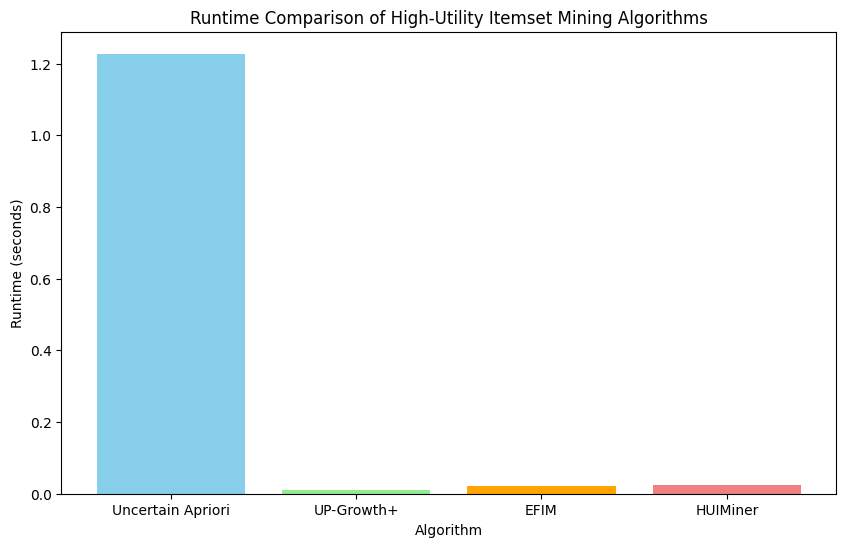

In [19]:
import matplotlib.pyplot as plt

def plot_runtime_comparison():
    # Algorithm names and their corresponding runtimes
    algorithms = ['Uncertain Apriori', 'UP-Growth+', 'EFIM', 'HUIMiner']
    runtimes = [runtime_5_UApriori, runtime_5_UP, runtime_5_EFIM, runtime_5_HUIMiner]

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, runtimes, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
    plt.xlabel('Algorithm')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime Comparison of High-Utility Itemset Mining Algorithms')
    plt.show()

# Call the function to display the graph
plot_runtime_comparison()


In [20]:
"""
Time complexity :
Uncertain-Apriori : O(2^n x k x n)
Up-Growth+ : O(n^d x k)
EFIM : O(p x k + n x log(n))
HUIMiner : O(2^n + k x m)

  * d: Depth of the utility pattern tree.
  * n: Number of items in the dataset.
  * 𝑘: Number of transactions in the dataset.
  * m: Average transaction size.

+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+
|Algorithms          |Strengths                                              |Weaknesses                                                         |
+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+
|Uncertain           | - Easy to understand and implement                    | - Generates a large number of candidate itemsets                  |
|Apriori             | - Useful for small datasets                           | - High computational cost; inefficient on large datasets          |
|                    | - Handles item probabilities well                     | - Does not scale well for dense datasets                          |
+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+
|UP-Growth+          | - Effective pruning strategies reduce search space    | - More memory usage compared to simpler algorithms                |
|                    | - Optimized for large datasets                        | - Complex to implement                                            |
|                    | - Reduces memory usage through UP-Tree structure      | - Pruning strategies may be difficult to tune                     |
+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+
|EFIM                | - Highly efficient for both dense and sparse datasets | - Implementation complexity due to advanced data structures       |
|                    | - No candidate generation; saves memory               | - May struggle with datasets that have extreme utility variations |
|                    | - Uses utility-list and database projection techniques|                                                                   |
+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+
|HUIMiner            | - Faster execution with no candidate generation       | - Efficiency varies based on data structure                       |
|                    | - Efficient for large databases                       | - Complex pruning strategies                                      |
|                    | - Uses utility-list merging to reduce search space    | - Difficult to implement correctly                                |
+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+

GOTO ALGORITHM WOULD BE EFIM
1. Efficiency in Search Space Pruning:
Utility Upper-Bounding: EFIM introduces an advanced strategy to prune the search space early. By calculating an upper bound on utility for each node (candidate itemset), it avoids exploring less promising branches, significantly reducing computation time.
Transaction Merging: EFIM merges similar transactions to avoid redundant calculations, enhancing performance when many transactions share common items.
2. Improved Data Structures:
Utility-List Structure: EFIM uses an optimized data structure called utility-lists. These lists store utility and transaction information, allowing efficient updates and comparisons. This minimizes the need to scan the dataset repeatedly.
Vertical Representation: Unlike horizontal approaches (e.g., Uncertain Apriori), EFIM’s vertical format allows direct access to itemsets and their associated utilities.
3. Handling of Dense and Sparse Data:
Dense Data: EFIM performs well with dense datasets (many overlapping itemsets), where utility pruning is more effective.
Sparse Data: Its utility-list pruning technique also handles sparse datasets efficiently by avoiding unnecessary candidate generation.
4. Flexibility for Real-World Scenarios:
Negative and Positive Utilities: EFIM naturally handles datasets with mixed positive and negative utilities, making it suitable for real-world applications where gains and losses coexist.
High Scalability: EFIM scales better as the dataset grows, making it robust for larger transaction databases.
5. Comparison with Other Algorithms:
Uncertain Apriori: While simple and intuitive, it generates many candidate itemsets, leading to higher computational overhead.
UP-Growth+: Efficient but generally outperformed by EFIM in terms of speed and memory, especially in large datasets.
HUIMiner: Similar to EFIM but lacks the optimized transaction merging and pruning mechanisms, making EFIM faster in most scenarios.
"""

'\nTime complexity :\nUncertain-Apriori : O(2^n x k x n)\nUp-Growth+ : O(n^d x k)\nEFIM : O(p x k + n x log(n))\nHUIMiner : O(2^n + k x m)\n\n  * d: Depth of the utility pattern tree.\n  * n: Number of items in the dataset.\n  * 𝑘: Number of transactions in the dataset.\n  * m: Average transaction size.\n\n+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+\n|Algorithms          |Strengths                                              |Weaknesses                                                         |\n+--------------------+-------------------------------------------------------+-------------------------------------------------------------------+\n|Uncertain           | - Easy to understand and implement                    | - Generates a large number of candidate itemsets                  |\n|Apriori             | - Useful for small datasets                           | - High computational 